# Presented by: JISHA VARGHESE (Data Science Enthusiast)

# Internship Topic: Employee Attrition Prediction using HR Analytics

## Overview of the Problem Statement


Employee attrition (resignation/exit from the company) is a major challenge for HR departments.
The goal of this project is to analyze employee data, identify key factors leading to attrition, and build a prediction model that helps organizations reduce turnover and improve employee retention.

## Target Variable

Attrition (Yes / No)
This indicates whether an employee has left the company or not.
This is the label we want to predict in Machine Learning.

## Objective


### Perform EDA (Exploratory Data Analysis) to find important trends and patterns.

### Build a Machine Learning model to predict employee attrition.

### Provide insights to HR that can help in decision-making.

## Data Description


The dataset contains employee details like demographics, work experience, salary, performance, and job satisfaction.

Key Features (Columns):

Demographics: Age, Gender, MaritalStatus, Over18

Job & Role: Department, JobRole, JobLevel, BusinessTravel, DistanceFromHome

Performance & Work: JobInvolvement, PerformanceRating, TrainingTimesLastYear, WorkLifeBalance

Salary & Income: MonthlyIncome, DailyRate, HourlyRate, PercentSalaryHike, StockOptionLevel

Experience: TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

Other: EmployeeNumber, EmployeeCount, StandardHours (constant)


## Data Size


### Rows (Employees): ~1470 

### Features (Columns): 35 

# Step 1: Load Data

In [41]:
# 1. Import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")# to prevent warning msgs

In [2]:
# 2. Load dataset
df = pd.read_csv("Employee_HR_analytics.csv")

In [5]:
# 3. Basic info
print("✅ Data Loaded Successfully!\n")


✅ Data Loaded Successfully!



In [26]:
print("Shape of dataset (rows, columns):", df.shape)


Shape of dataset (rows, columns): (1000, 35)


In [28]:
print("\nFirst 5 rows:")
display(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)



First 5 rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Column names:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Data types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
Env

In [30]:
# 4. Missing values check
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

In [32]:
# 5. Quick statistics
print("\nSummary statistics:")
display(df.describe())



Summary statistics:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,36.992000,808.437000,9.0670,2.868000,1.0,690.073000,2.731000,65.163000,2.730000,2.095000,...,2.741000,80.0,0.762000,11.410000,2.773000,2.763000,7.134000,4.26600,2.23500,4.168000
std,9.417783,405.508487,8.1089,1.030358,0.0,406.416188,1.083426,20.209227,0.703986,1.139857,...,1.087705,0.0,0.836694,8.006748,1.311942,0.698082,6.355032,3.63572,3.30283,3.630283
min,18.000000,102.000000,1.0000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000
25%,30.000000,470.750000,2.0000,2.000000,1.0,341.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.00000,2.000000
50%,36.000000,817.000000,7.0000,3.000000,1.0,678.000000,3.000000,65.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.00000,3.000000
75%,43.000000,1157.250000,14.0000,4.000000,1.0,1038.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.00000,7.000000
max,60.000000,1499.000000,29.0000,5.000000,1.0,1408.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.00000,17.000000


In [7]:
# 6. Unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Unique values in Attrition: ['Yes' 'No']

Unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique values in Department: ['Sales' 'Research & Development' 'Human Resources']

Unique values in EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Unique values in Gender: ['Female' 'Male']

Unique values in JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Unique values in MaritalStatus: ['Single' 'Married' 'Divorced']

Unique values in Over18: ['Y']

Unique values in OverTime: ['Yes' 'No']


# Step 2: Basic EDA Plots

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
# 2.1 Check missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EducationField                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSin

In [111]:
# 2.2 Summary statistics
print("\nSummary statistics:\n", df.describe())



Summary statistics:
                 Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1.000000e+03  1000.000000  1000.000000      1.000000e+03  1000.000000   
mean   2.842171e-16     0.167000   808.437000     -2.486900e-17     2.868000   
std    1.000500e+00     0.373162   405.508487      1.000500e+00     1.030358   
min   -2.017620e+00     0.000000   102.000000     -9.953306e-01     1.000000   
25%   -7.427968e-01     0.000000   470.750000     -8.719476e-01     2.000000   
50%   -1.053854e-01     0.000000   817.000000     -2.550326e-01     3.000000   
75%    6.382613e-01     0.000000  1157.250000      6.086483e-01     4.000000   
max    2.444260e+00     1.000000  1499.000000      2.459393e+00     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1000.000000  1000.000000     1000.000000  1000.000000   
mean                  2.731000    65.163000        2.730000     2.095000   
std                   1.08342

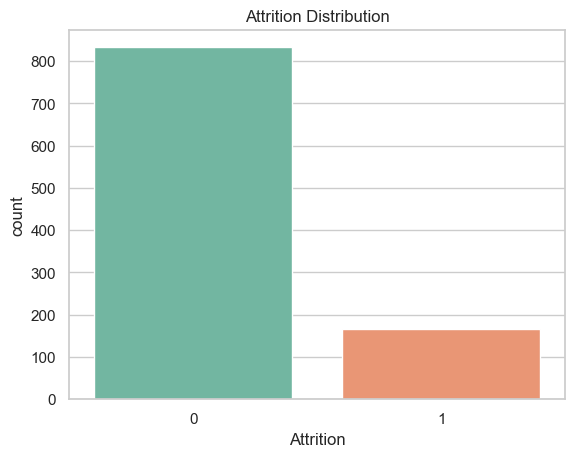

In [113]:
# 2.3 Target distribution
sns.countplot(x='Attrition', data=df, palette="Set2")
plt.title("Attrition Distribution")
plt.show()


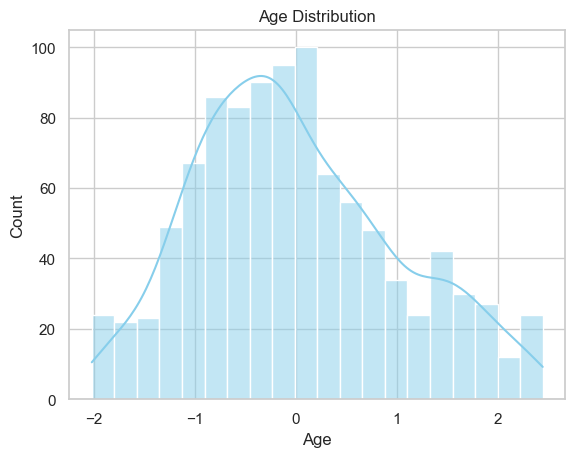

In [115]:
# 2.4 Numeric feature example visualization
sns.histplot(df['Age'], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution")
plt.show()

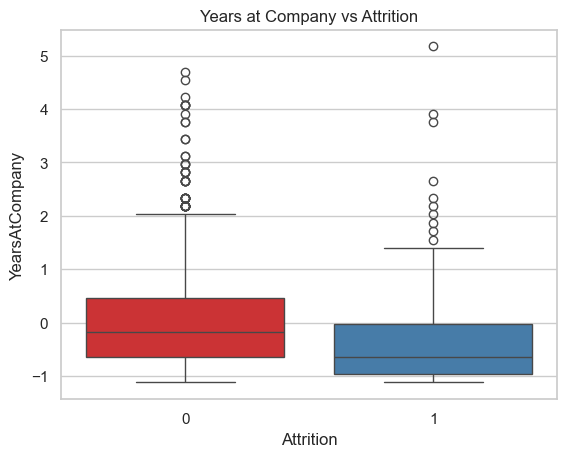

In [117]:
# 2.5 Boxplot example
sns.boxplot(x="Attrition", y="YearsAtCompany", data=df, hue="Attrition", palette="Set1", legend=False)
plt.title("Years at Company vs Attrition")
plt.show()


# Step 3: Data Preprocessing (Simplified & Clean)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
# 3.1 Drop EmployeeNumber (ID-like, not useful)
df = df.drop(columns=["EmployeeNumber"], errors="ignore")

In [23]:
# 3.2 Handle missing values
print("\n🔹 Missing values before cleaning:")
print(df.isnull().sum())

df = df.dropna()

print("\n Missing values handled")
print("Remaining rows:", df.shape[0])



🔹 Missing values before cleaning:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
Years

In [21]:
# 3.3 Encode categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nCategorical columns to encode:", categorical_cols.tolist())

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n Encoding done")
print("New shape:", df_encoded.shape)



Categorical columns to encode: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

 Encoding done
New shape: (1000, 47)


In [25]:
# 3.4 Define features (X) and target (y)
X = df_encoded.drop(columns=["Attrition_Yes"], errors="ignore")
y = df_encoded["Attrition_Yes"]

print("\nTarget variable distribution (y):")
print(y.value_counts())



Target variable distribution (y):
Attrition_Yes
False    833
True     167
Name: count, dtype: int64


In [27]:
# 3.5 Train-Test Split (stratify to keep balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n Train-Test Split Completed")
print("Training set:", X_train.shape, "Testing set:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())



 Train-Test Split Completed
Training set: (800, 46) Testing set: (200, 46)
y_train distribution:
 Attrition_Yes
False    666
True     134
Name: count, dtype: int64
y_test distribution:
 Attrition_Yes
False    167
True      33
Name: count, dtype: int64


# Step 4: Machine Learning Model Training & Evaluation

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# 4.1 Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)   # Train the model


LogisticRegression(max_iter=1000, random_state=42)

In [33]:
# Predictions
y_pred_log = log_reg.predict(X_test)

print(" Logistic Regression Model Trained Successfully!\n")


 Logistic Regression Model Trained Successfully!



In [35]:
# Accuracy
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred_log))

Accuracy on Test Data: 0.845


In [37]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))



Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.96      0.91       167
        True       0.57      0.24      0.34        33

    accuracy                           0.84       200
   macro avg       0.72      0.60      0.63       200
weighted avg       0.82      0.84      0.82       200



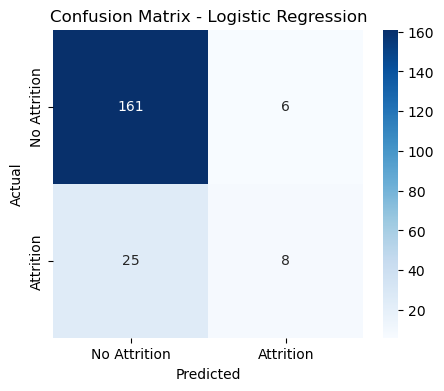

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition","Attrition"], yticklabels=["No Attrition","Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# Step 5 – Save Model & Export Predictions

In [48]:
import joblib
import pandas as pd

# 5.1 Save the trained Logistic Regression model
joblib.dump(log_reg, "logistic_model_hr.pkl")
print(" Model saved as 'logistic_model_hr.pkl'")


 Model saved as 'logistic_model_hr.pkl'


In [50]:
# 5.2 Make predictions on test data
y_pred = log_reg.predict(X_test)


In [52]:
# 5.3 Save predictions to CSV (optional for reporting/presentation)
predictions = pd.DataFrame({
    "EmployeeIndex": X_test.index,   # or EmployeeNumber if kept in X
    "ActualAttrition": y_test,
    "PredictedAttrition": y_pred
})

predictions.to_csv("attrition_predictions.csv", index=False)
print(" Predictions saved as 'attrition_predictions.csv'")


 Predictions saved as 'attrition_predictions.csv'


# Step 6: Display Model Accuracy

In [75]:
import pandas as pd

# Load prediction results
df_pred = pd.read_csv("attrition_predictions.csv")

# Calculate accuracy
accuracy = (df_pred['ActualAttrition'] == df_pred['PredictedAttrition']).mean()
print(f" Model Accuracy: {accuracy*100:.2f}%")

 Model Accuracy: 84.50%


# Step 7: Conclusion


### 1.The Logistic Regression model was trained to predict employee attrition.

### 2.The model achieved an accuracy of 84.50% on the test dataset.

### 3.Predictions were generated for all employees and saved in attrition_predictions.csv.

### 4.The trained model was saved as logistic_model_hr.pkl for future use.